# Pima Indians Diabetes Dataset:Exploratory Data Analysis
In this notebook, we're going to analyse the famous Pima Indians Diabetes dataset from Kaggle.The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

#We'll try to answer the following questions:
1.What is the distribution of different independent variables w.r.t Outcome?

2 Trace out range of Age and different independent variables w.r.t Outcome for healthy and diabetic people ?

3 Trace out range of Glucose and different independent variables w.r.t Outcome for healthy and diabetic people ?

4 Trace out range of SkinThickness and BMI  w.r.t Outcome for healthy and diabetic people ?

  
       






In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.io as pio
pio.renderers.default = "colab"
import warnings
warnings.filterwarnings('ignore')


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#Dataset is downloaded from Kaggle
diabetes=pd.read_csv("/content/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Renaming the columns
diabetes=diabetes.rename(columns={'BloodPressure':'BP','DiabetesPedigreeFunction':'DPF'})

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
columns=['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI']
for i in columns:
  print(diabetes[i].unique())
  

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

# Useful insights:-
1.Count of Pregnancies >10 is doubtful.

2.Glucose,BP,SkinThickness,Insulin,BMI contains 0 which is null value.





In [5]:
#Replacing 0 with NAN values
diabetes[['Glucose','BP','SkinThickness','Insulin','BMI']]=diabetes[['Glucose','BP','SkinThickness','Insulin','BMI']].replace(0,np.nan)




  

In [ ]:
diabetes.isnull().sum().sort_values(ascending=False).iplot(kind='bar')

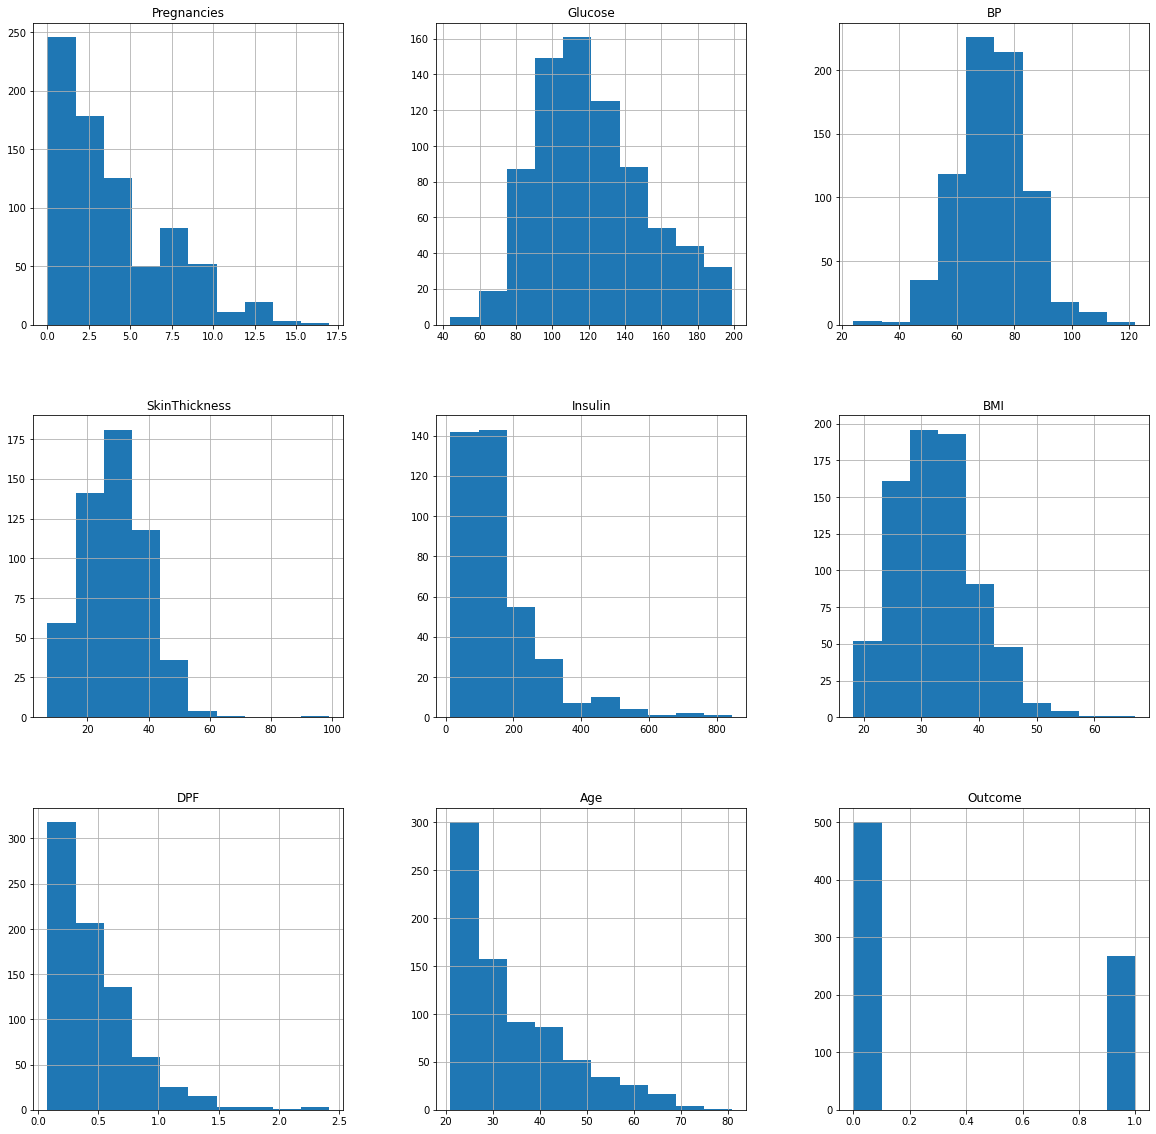

In [ ]:
#For imputation of missing values we have to understand the distribution of each column
diabetes.hist(figsize=(20,20))
plt.show()


In [6]:
#Imputation of missing values
diabetes['Insulin']=diabetes['Insulin'].replace(np.nan,diabetes['Insulin'].median())
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(np.nan,diabetes['SkinThickness'].median())
diabetes['BP']=diabetes['BP'].replace(np.nan,diabetes['BP'].mean())
diabetes['BMI']=diabetes['BMI'].replace(np.nan,diabetes['BMI'].mean())


# What is distribution of different independent variables w.r.t Outcome?

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='Pregnancies',points='all',box=True,title='Pregnancy distribution')
fig.show()

## Useful insights:
Count of pregnancy of  healthy female lie in range (0-5).

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='Age',points='all',box=True,title='Age distribution')
fig.show()

### Useful insights:
Healthy people lie in age-g.p(20-30)

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='Glucose',points='all',box=True,title='Glucose distribution')
fig.show()

## Useful insights:
Glucose of healthy people is <130

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='BP',points='all',box=True,title='BP distribution')
fig.show()

## Useful insights:
BP of healthy people is <80

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='SkinThickness',points='all',box=True,title='SkinThickness distribution')
fig.show()

## Useful insights:
SkinThickness of healthy people is < 30

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='Insulin',points='all',box=True,title='Insulin distribution')
fig.show()

## Useful insights:
Insulin of healthy people is < 150

In [ ]:
fig=px.violin(diabetes,x='Outcome',y='BMI',points='all',box=True,title='BMI distribution')
fig.show()

## Useful insights:
BMI of healthy people is < 40

# Trace out range of Age and different independent variables w.r.t Outcome for healthy and diabetic people ?

In [ ]:
fig=px.scatter(diabetes,x='Glucose',y='Age',color='Outcome',title='Age vs Glucose')
fig.show()

## Useful insights:
Healthy people is concentrated in( age<=30 & Glucose level <=120)

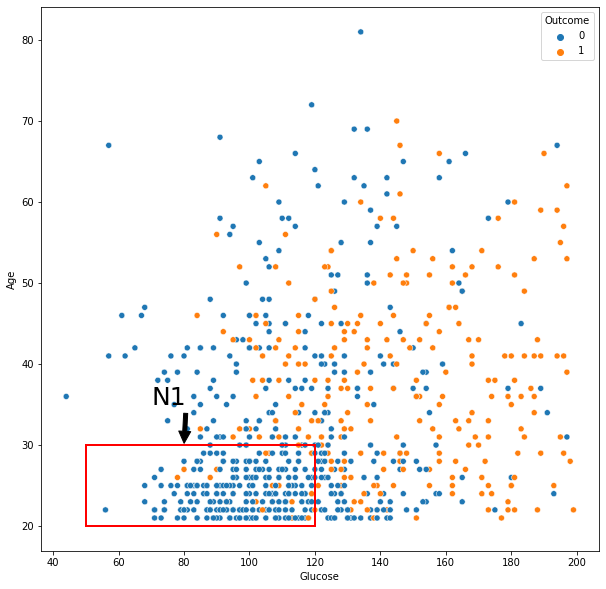

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Glucose',y='Age',hue='Outcome',data=diabetes)
plt.annotate('N1',size=25,xy=(80,30),xytext=(70,35),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([50,120],[30,30],linewidth=2,color='Red')
plt.plot([50,120],[20,20],linewidth=2,color='Red')
plt.plot([50,50],[20,30],linewidth=2,color='Red')
plt.plot([120,120],[20,30],linewidth=2,color='Red')

In [9]:

def barplot(var_select,sub):
  tmp1=diabetes[diabetes['Outcome']==1]
  tmp2=diabetes[diabetes['Outcome']==0]
  tmp3=pd.DataFrame(pd.crosstab(diabetes[var_select],diabetes['Outcome']))
  tmp3['%diabetic']=(tmp3[1]/(tmp3[0]+tmp3[1]))*100
  trace1=go.Bar(x=tmp1[var_select].value_counts().keys().tolist(),
                y=tmp1[var_select].value_counts().values.tolist(),
                text=tmp1[var_select].value_counts().values.tolist(),
                textposition='auto',
                name='Diabetic',
                marker=dict(color='lightskyblue',line=dict(color='#000000',width=1)))
               
  trace2=go.Bar(x=tmp2[var_select].value_counts().keys().tolist(),
                y=tmp2[var_select].value_counts().values.tolist(),
                text=tmp2[var_select].value_counts().values.tolist(),
                textposition='auto',
                name='Healthy',
                marker=dict(color='gold',line=dict(color='#000000',width=1)))
            
  trace3=go.Scatter(x=tmp3.index,
                    y=tmp3['%diabetic'],
                    yaxis='y2',
                    name='%diabetic',
                    marker=dict(color='Blue',line=dict(color='#000000',width=1)))
                    
  layout=dict(xaxis=dict(),
              yaxis=dict(title='Count'),
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'),
                title=  str(var_select)+' '+(sub))
  fig=go.Figure(data=[trace1,trace2,trace3],layout=layout) 
  fig.show()                 

                


In [18]:
diabetes.loc[:,'N1']=0
diabetes.loc[(diabetes['Age']<=30)&(diabetes['Glucose']<=120),'N1']=1

In [19]:
barplot('N1',':Age <=30 & Glucose <=120')

In [21]:
def pieplot(var_select):
  tmp1=diabetes[diabetes['Outcome']==1]
  tmp2=diabetes[diabetes['Outcome']==0]
  col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
  trace1=go.Pie(values=tmp1[var_select].value_counts().values.tolist(),
                labels=tmp1[var_select].value_counts().keys().tolist(),
                textfont=dict(size=15),
                hoverinfo = "label+percent+name",
             
                hole=0.5,
                name = "Diabetic",
                domain = dict(x = [0,0.48]),
                marker=dict(colors=col,line = dict(width = 1.5)))
  trace2=go.Pie(values=tmp2[var_select].value_counts().values.tolist(),
                labels=tmp2[var_select].value_counts().keys().tolist(),
                hoverinfo = "label+percent+name",
               
                textfont=dict(size=15),
                hole=0.5,
                name = "Healthy",
                domain  = dict(x = [.52,1]),
                marker=dict(line = dict(width = 1.5)))
  layout = go.Layout(dict(title = var_select + " distribution by target",
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size =18),
                                                showarrow = False,
                                                x = .1,y=-0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 18),
                                                showarrow = False,
                                                x = .9,y=-0.1)]))
  fig=go.Figure(data=[trace1,trace2],layout=layout)
  fig.show()

In [22]:
pieplot('N1')

In [23]:
fig=px.scatter(diabetes,x='Pregnancies',y='Age',color='Outcome',title='Age vs Pregnancy')
fig.show()

## Useful insights:-
Healthy people is concentrated in( age<=30 & Pregnancy<=6)

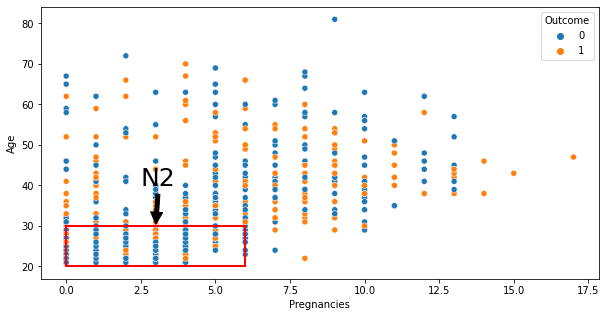

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Pregnancies',y='Age',hue='Outcome',data=diabetes)
plt.annotate('N2',size=25,xy=(3,30),xytext=(2.5,40),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0,6],[30,30],color='Red',linewidth=2)
plt.plot([0,6],[20,20],color='Red',linewidth=2)
plt.plot([0,0],[20,30],color='Red',linewidth=2)
plt.plot([6,6],[20,30],color='Red',linewidth=2)

In [29]:
diabetes.loc[:,'N2']=0
diabetes.loc[(diabetes['Age']<=30)& (diabetes['Pregnancies']<=6),'N2']=1

In [30]:
barplot('N2',':Age <=30 & Pregnancies<=6')




In [31]:
pieplot('N2')

In [28]:
fig=px.scatter(diabetes,x='BP',y='Age',color='Outcome',title='Age vs BP')
fig.show()


## Useful insights:-
Healthy people is concentrated in( age<=30 & BP<=80)


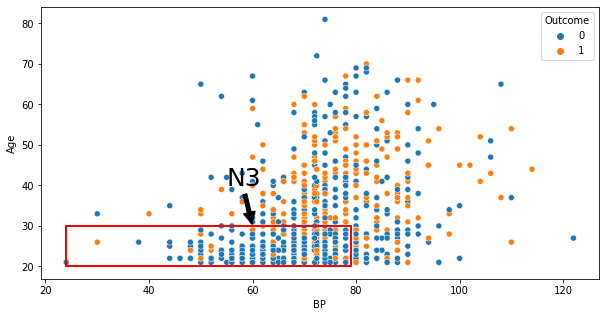

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BP',y='Age',hue='Outcome',data=diabetes)
plt.annotate('N3',size=25,xy=(60,30),xytext=(55,40),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([24,79],[30,30],linewidth=2,color='Red')
plt.plot([24,79],[20,20],linewidth=2,color='Red')
plt.plot([24,24],[20,30],linewidth=2,color='Red')
plt.plot([79,79],[20,30],linewidth=2,color='Red')

In [34]:
diabetes.loc[:,'N3']=0
diabetes.loc[(diabetes['Age']<=30)&(diabetes['BP']<=80),'N3']=1

In [35]:
barplot('N3',':Age <=30 & BP<=80')

In [36]:
pieplot('N3')

In [37]:
fig=px.scatter(diabetes,x='SkinThickness',y='Age',color='Outcome',title='Age vs SkinThickness')
fig.show()


## Useful insights:-
Healthy people is concentrated in( age<=30 & SkinThickness<=32)


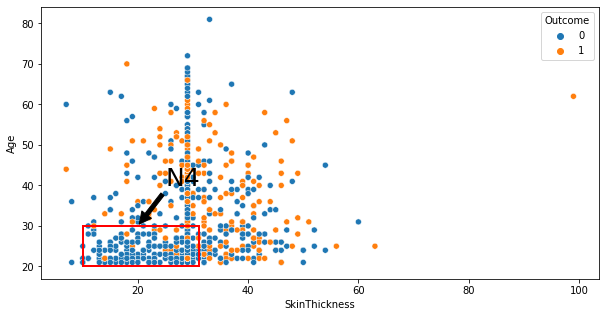

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='SkinThickness',y='Age',hue='Outcome',data=diabetes)
plt.annotate('N4',size=25,xy=(20,30),xytext=(25,40),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([10,31],[30,30],linewidth=2,color='Red')
plt.plot([10,31],[20,20],linewidth=2,color='Red')
plt.plot([10,10],[20,30],linewidth=2,color='Red')
plt.plot([31,31],[20,30],linewidth=2,color='Red')



In [39]:
diabetes.loc[:,'N4']=0
diabetes.loc[(diabetes['Age']<=30)&(diabetes['SkinThickness']<=32),'N4']=1

In [40]:
barplot('N4',':Age<=30 & SkinThickness<=32')

In [41]:
pieplot('N4')

In [42]:
fig=px.scatter(diabetes,x='Insulin',y='Age',color='Outcome',title='Age vs Insulin')
fig.show()

## Useful insights:-
Healthy people is concentrated in( age<=30 & Insulin <=130)

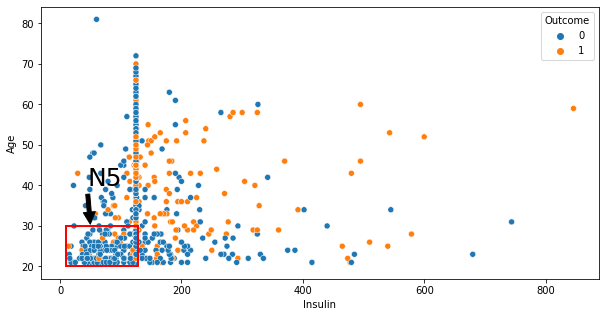

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Insulin',y='Age',hue='Outcome',data=diabetes)
plt.annotate('N5',size=25,xy=(50,30),xytext=(45,40),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([10,129],[30,30],linewidth=2,color='Red')
plt.plot([10,129],[20,20],linewidth=2,color='Red')
plt.plot([10,10],[20,30],linewidth=2,color='Red')
plt.plot([129,129],[20,30],linewidth=2,color='Red')



In [44]:
diabetes.loc[:,'N5']=0
diabetes.loc[(diabetes['Age']<=30)& (diabetes['Insulin']<=130),'N5']=1

In [45]:
barplot('N5',':Age<=30 & Insulin<=130')

In [46]:
pieplot('N5')

In [ ]:
fig=px.scatter(diabetes,x='BMI',y='Age',color='Outcome',title='Age vs BMI')
fig.show()

## Useful insights:-
Healthy people is concentrated in( age<=30 & BMI<=30)

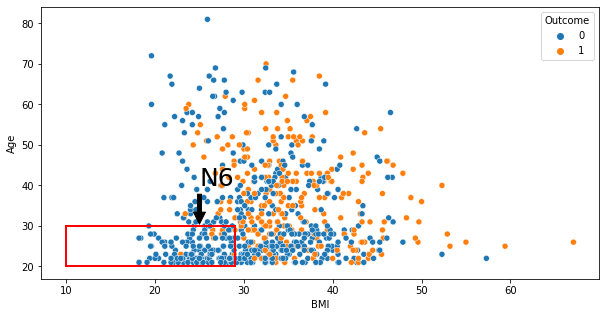

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BMI',y='Age',hue='Outcome',data=diabetes)
plt.annotate('N6',size=25,xy=(25,30),xytext=(25,40),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([10,29],[30,30],linewidth=2,color='Red')
plt.plot([10,29],[20,20],linewidth=2,color='Red')
plt.plot([10,10],[20,30],linewidth=2,color='Red')
plt.plot([29,29],[20,30],linewidth=2,color='Red')




In [50]:
diabetes.loc[:,'N6']=0
diabetes.loc[(diabetes['Age']<=30)&(diabetes['BMI']<=30),'N6']=1

In [51]:
barplot('N6',':Age<=30 & BMI<=30')

In [52]:
pieplot('N6')


# Trace out range of Glucose and different independent variables w.r.t Outcome for healthy and diabetic people ?

In [ ]:
fig=px.scatter(diabetes,x='Glucose',y='BP',color='Outcome',title='Glucose vs BP')
fig.show()

## Useful insights:-
Healthy people is concentrated in( BP<=80 & Glucose <=110)

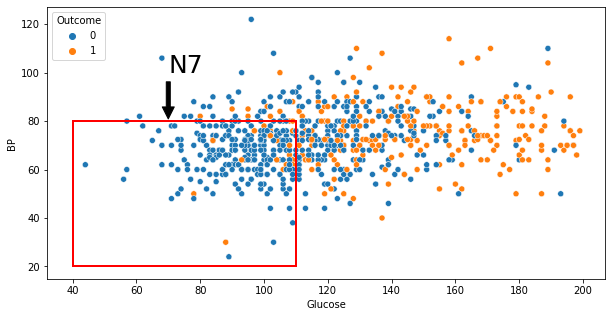

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Glucose',y='BP',hue='Outcome',data=diabetes)
plt.annotate('N7',size=25,xy=(70,80),xytext=(70,100),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([40,110],[20,20],linewidth=2,color='Red')
plt.plot([40,110],[80,80],linewidth=2,color='Red')
plt.plot([40,40],[20,80],linewidth=2,color='Red')
plt.plot([110,110],[20,80],linewidth=2,color='Red')



In [54]:
diabetes.loc[:,'N7']=0
diabetes.loc[(diabetes['BP']<=80)&(diabetes['Glucose']<=110),'N7']=1

In [55]:
barplot('N7',':BP<=80 & Glucose<=120')

In [56]:
pieplot('N7')

In [ ]:
fig=px.scatter(diabetes,x='Glucose',y='Pregnancies',color='Outcome',title='Glucose vs Pregnancies')
fig.show()

## Useful insights:-
Healthy people is concentrated in( Glucose <=110 & Pregnancies <=6)

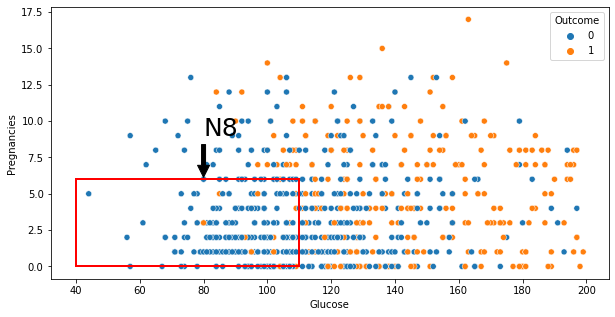

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Glucose',y='Pregnancies',hue='Outcome',data=diabetes)
plt.annotate('N8',size=25,xy=(80,6),xytext=(80,9),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([40,110],[6,6],linewidth=2,color='Red')
plt.plot([40,110],[0,0],linewidth=2,color='Red')
plt.plot([40,40],[0,6],linewidth=2,color='Red')
plt.plot([110,110],[0,6],linewidth=2,color='Red')





In [57]:
diabetes.loc[:,'N8']=0
diabetes.loc[(diabetes['Glucose']<=110)&(diabetes['Pregnancies']<=6),'N8']=1

In [60]:
barplot('N8',':Glucose<=110 & Pregnancies<=6')

In [62]:
pieplot('N8')

In [63]:
fig=px.scatter(diabetes,x='Glucose',y='SkinThickness',color='Outcome',title='Glucose vs SkinThickness')
fig.show()

##Useful insights:-
Healthy people is concentrated in(Glucose<=110 & SkinThickness<=30)

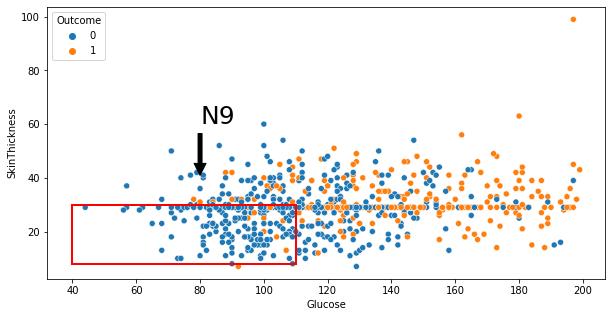

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Glucose',y='SkinThickness',hue='Outcome',data=diabetes)
plt.annotate('N9',size=25,xy=(80,40),xytext=(80,60),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([40,110],[8,8],linewidth=2,color='Red')
plt.plot([40,110],[30,30],linewidth=2,color='Red')
plt.plot([40,40],[8,30],linewidth=2,color='Red')
plt.plot([110,110],[8,30],linewidth=2,color='Red')



In [68]:
diabetes.loc[:,'N9']=0
diabetes.loc[(diabetes['Glucose']<=110) &(diabetes['SkinThickness']<=30),'N9']=1

In [71]:
barplot('N9',':Glucose<=110 & SkinThickness<=30')

In [72]:
pieplot('N9')

In [ ]:
fig=px.scatter(diabetes,x='Glucose',y='Insulin',color='Outcome',title='Glucose vs Insulin')
fig.show()

## Useful insights:
Healthy people is concentrated in(Glucose<=120 & Insulin<=125)

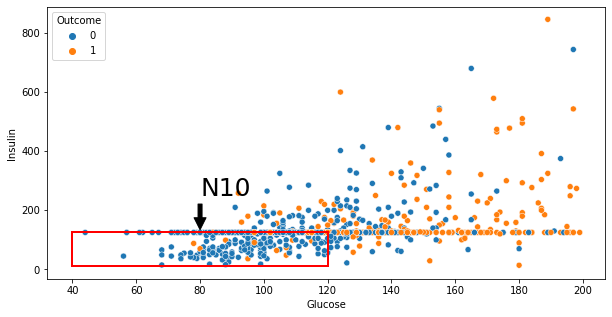

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Glucose',y='Insulin',hue='Outcome',data=diabetes)
plt.annotate('N10',size=25,xy=(80,129),xytext=(80,250),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([40,120],[10,10],linewidth=2,color='Red')
plt.plot([40,120],[125,125],linewidth=2,color='Red')
plt.plot([40,40],[10,125],linewidth=2,color='Red')
plt.plot([120,120],[10,125],linewidth=2,color='Red')



In [77]:
diabetes.loc[:,'N10']=0
diabetes.loc[(diabetes['Glucose']<=120)&(diabetes['Insulin']<=125),'N10']=1

In [78]:
barplot('N10',':Glucose<=120 & Insulin<=125')

In [79]:
pieplot('N10')

In [ ]:
fig=px.scatter(diabetes,x='Glucose',y='BMI',color='Outcome',title='Glucose vs BMI')
fig.show()

## Useful insights:-
Healthy people is concentrated in(Glucose<=110 & BMI<=35)

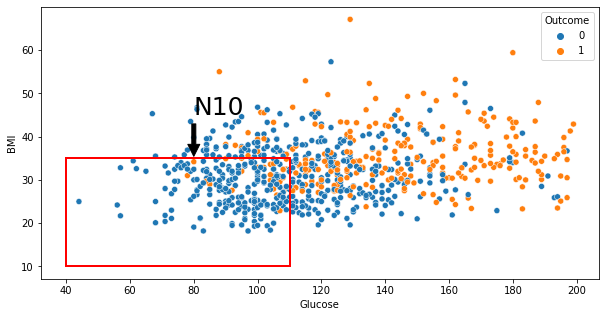

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Glucose',y='BMI',hue='Outcome',data=diabetes)
plt.annotate('N10',size=25,xy=(80,35),xytext=(80,45),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([40,110],[10,10],linewidth=2,color='Red')
plt.plot([40,110],[35,35],linewidth=2,color='Red')
plt.plot([40,40],[10,35],linewidth=2,color='Red')
plt.plot([110,110],[10,35],linewidth=2,color='Red')



In [84]:
diabetes.loc[:,'N10']=0
diabetes.loc[(diabetes['Glucose']<=110)&(diabetes['BMI']<=35),'N10']=1

In [85]:
barplot('N10',':Glucose<=110 & BMI<=35')

In [86]:
pieplot('N10')

# Trace out range of SkinThickness and BMI  w.r.t Outcome for healthy and diabetic people ?

In [87]:
fig=px.scatter(diabetes,x='SkinThickness',y='BMI',color='Outcome',title='SkinThickness vs BMI')
fig.show()

## Useful insights:-
Healthy people lie in (BMI<30 & SkinThickness<=32)

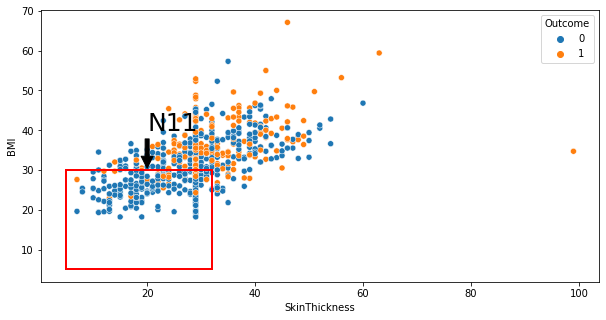

In [95]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='SkinThickness',y='BMI',hue='Outcome',data=diabetes)
plt.annotate('N11',size=25,xy=(20,30),xytext=(20,40),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([5,32],[5,5],linewidth=2,color='Red')
plt.plot([5,32],[30,30],linewidth=2,color='Red')
plt.plot([32,32],[5,30],linewidth=2,color='Red')
plt.plot([5,5],[5,30],linewidth=2,color='Red')





In [96]:
diabetes.loc[:,'N11']=0
diabetes.loc[(diabetes['SkinThickness']<=32)&(diabetes['BMI']<=30),'N11']=1

In [97]:
barplot('N11',':SkinThickness<=32 & BMI<=30')

In [99]:
pieplot('N11')

## Note:-
To add to this project, we can try running ML algorithms on the data  to see if we can create a model that accurately predicts whether a person is healthy or diabetic.

This notebook will be updated with those sections in the future.